### M/M/1 vs M/M/2
##### Imports



In [2]:
import simpy
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

### General M/M/n queue

In [6]:

# This function defines the customer arrivals at the queue.
def arrivals(env, n, interval, counter, waiting_times, mu):
    # Generate n arrivals to the counter.
    for i in range(n):
        # Generate a 'customer' process.
        c = customer(env, f'Customer{i}', counter, waiting_times, mu)
        # Add it to the environment.
        env.process(c)
        # Calculate the time to the next arrival.
        t = random.expovariate(interval)
        # Pause the 'arrivals' process, simulating waiting time.
        yield env.timeout(t)

# This function defines the process every customer goes through.
def customer(env, name, counter, time_in_system, mu):
    # Logs the arrival time of the customer.
    arrive = env.now
    # The customer requests a counter.
    with counter.request() as req:
        # Wait for the counter to be available.
        yield req
        # Calculate the time the customer waited and append.
        wait = env.now - arrive
        time_in_system.append(wait)
        # Calculate the time it takes to help the customer.
        tis = random.expovariate(mu)
        yield env.timeout(tis)


# Runs the simulation N times for a certain number of servers.
def run_simulation(num_servers, N, lambda_, mu, sim_time):
    waiting_times = []
    # Run the simulation N times.
    for _ in range(N):
        # Set timeline and manage scheduling and processing of events.
        env = simpy.Environment()
        # Make the counter with a certain number of servers.
        counter = simpy.Resource(env, capacity=num_servers)
        # Start the arrival process.
        env.process(arrivals(env, sim_time, 1.0 / lambda_, counter, waiting_times, mu))
        # Run the simulation until events are handled or time runs out.
        env.run()
    # Calculate average waiting time.
    average_wait = np.mean(waiting_times)
    return average_wait
    


### Priority M/M/1 queue

In [11]:
# This function defines the customer arrivals at the queue.
def priority_arrivals(env, n, interval, counter, waiting_times, mu):
    # Generate n arrivals to the counter.
    for i in range(n):
        # Generate a 'customer' process.
        c = priority_customer(env, f'Customer{i}', counter, waiting_times, mu)
        # Add it to the environment.
        env.process(c)
        # Calculate the time to the next arrival.
        t = random.expovariate(interval)
        # Pause the 'arrivals' process, simulating waiting time.
        yield env.timeout(t)


# This function defines the process every customer goes through.
def priority_customer(env, name, counter, time_in_system, mu):
    # Logs the arrival time of the customer.
    arrive = env.now
    # Calculate the time it takes to help the customer.
    tis = random.expovariate(mu)
    # The customer requests a counter.
    with counter.PriorityRequest(priority=tis) as req:
        # Wait for the counter to be available.
        yield req
        print(f'{name} with help time {tis} was helped now')
        # Calculate the time the customer waited and append.
        wait = env.now - arrive
        time_in_system.append(wait)
        yield env.timeout(tis)
    
# Simulations of priority M/M/1 queue
def run_priority_simulation(N, lambda_, mu, sim_time):
    waiting_times = []
    # Run the simulation N times.
    for _ in range(N):
        # Set timeline and manage scheduling and processing of events.
        env = simpy.Environment()
        # Make the counter with a certain number of servers.
        counter = simpy.PriorityResource(env, capacity=1)
        # Start the arrival process.
        env.process(arrivals(env, sim_time, 1.0 / lambda_, counter, waiting_times, mu))
        # Run the simulation until events are handled or time runs out.
        env.run()
    # Calculate average waiting time.
    average_wait = np.mean(waiting_times)
    return average_wait
    

### M/M/n

In [7]:
# Parameters
lambda_ = 2  # arrival rate 
mu = 0.5  # service rate
sim_time = 100000 
N = 10   

# Run simulations for different numbers of servers and calculate average waiting time.
MMn_res = {}
for n in [1,2,4]:
    avg_wait = run_simulation(n, N, lambda_, mu, sim_time)
    MMn_res[n] = avg_wait
    print(f"System load: {lambda_ / (n * mu):.2f}")
    print(f'Average waiting time for M/M/{n}: {avg_wait:.2f}')

System load: 4.00
Average waiting time for M/M/1: 363.08


0
1
2
3
4
5
6
7
8
9


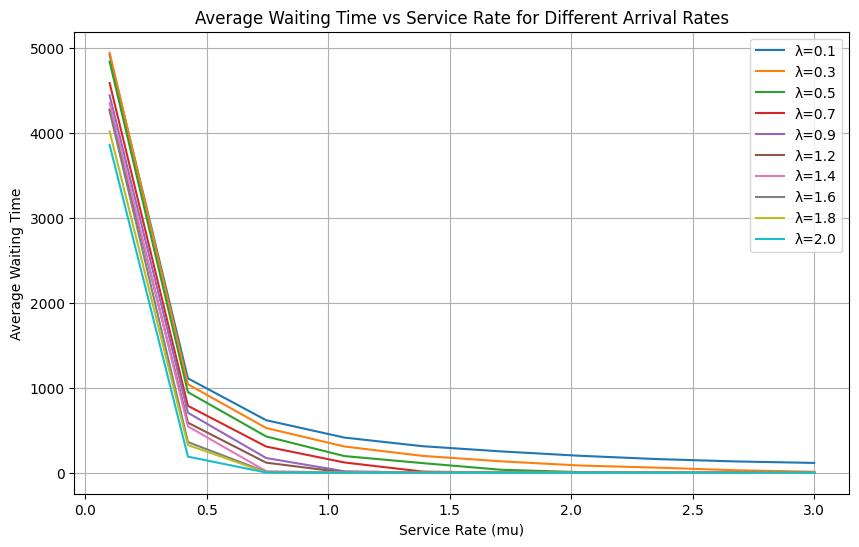

### Priority M/M/1

In [12]:
# Parameters
lambda_ = 2  # arrival rate 
mu = 0.5  # service rate
sim_time = 100000 
N = 10   

# Run simulations for different numbers of servers and calculate average waiting time.
MM1_res = run_priority_simulation(N, lambda_, mu, sim_time)
print(f"System load: {lambda_ / (n * mu):.2f}")
print(f'Average waiting time for M/M/{n}: {avg_wait:.2f}')

System load: 4.00
Average waiting time for M/M/1: 362.65
